In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon


# Price Ranges


In [2]:
df_price_range = pd.DataFrame(columns=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA'])
df_price_range['AAPL'] = ['20.83-70.58',abs(20.83-70.58)]
df_price_range['AMZN'] = ['14.31-101.63',abs(14.31-101.63)]
df_price_range['GOOG'] = ['24.80-68.75', abs(24.80-68.75)]
df_price_range['GOOGL'] = ['24.85-68.03',abs(24.85-68.03)]
df_price_range['MSFT'] = ['35.06-153.15',abs(35.06-153.15)]
df_price_range['TSLA'] = ['9.86-28.72', abs(9.86-28.72)]
df_price_range

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,20.83-70.58,14.31-101.63,24.80-68.75,24.85-68.03,35.06-153.15,9.86-28.72
1,49.75,87.32,43.95,43.18,118.09,18.86


In [3]:
def split_test_validation(df):
    dfx=df.copy()
    df_x_test=dfx[dfx['Metrics'].str.contains("Testing|testing")]
    df_x_val=dfx[dfx['Metrics'].str.contains("Validation|validation")] 
    return df_x_test, df_x_val

def show_metrics(df):
    dfx = df.copy()
    cols=dfx.columns.tolist()
    lstm_avrg_col=[]
    for row_index in range(len(dfx['Metrics'])):
        data=[]
        for ticker in cols[1:]:
            data.append(dfx[ticker][row_index])
        data=np.array(data)
        lstm_avrg_col.append(str(np.mean(data))[:5]+' ('+str(np.std(data))[:5]+')')
    dfx['Average(std)'] = lstm_avrg_col
    return split_test_validation(dfx)

def show_params(df):
    dfx = df.copy()
    cols=dfx.columns.tolist()
    lstm_avrg_col=[]
    for row_index in range(len(dfx['Architectures'])):
        data=[]
        for ticker in cols[1:]:
            data.append(dfx[ticker][row_index])
        data=np.array(data)
        lstm_avrg_col.append(float(np.mean(data)))
    dfx['Average'] = lstm_avrg_col
    return dfx
ranges=df_price_range.iloc[1].tolist()
classes=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

## Parameters

In [4]:
df_params = pd.read_csv('metrics/params.csv')
df_param=show_params(df_params)
pd.set_option('display.float_format', '{:,.2f}'.format)
df_param

,Architectures,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
0,LSTM,54541,145783,52683,47301,114081,60307,"79,116.00"
1,BiLSTM,369565,472213,68713,163213,57305,297713,"238,120.33"
2,GRU,7729,66921,84057,20721,76201,38481,"49,018.33"
3,BiGRU,54353,367473,156257,263201,39457,141121,"170,310.33"
4,TCN,459841,104641,68353,579569,148609,291809,"275,470.33"
5,BiTCN,691969,775457,2133601,1779841,961601,400513,"1,123,830.33"
6,TRANSFORMER,29174,29174,33430,10422,49190,10566,"26,992.67"


# LSTM Metrics

In [5]:
df_lstm = pd.read_csv('metrics/lstm_metrics.csv')
df_lstm_testing, df_lstm_validation = show_metrics(df_lstm)
df_lstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,9.03,48.79,14.07,13.12,137.66,3.21,37.64 (47.06)
2,testing-MAE,2.19,5.75,3.09,2.88,8.98,1.44,4.055 (2.575)
4,testing-mape,6.78,12.18,7.19,6.48,12.46,8.01,8.851 (2.498)
6,testing-RMSE,2.47,6.29,3.36,3.19,9.57,1.65,4.422 (2.710)
8,testing-MPE,2.41,10.84,2.37,2.37,12.14,-0.26,4.978 (4.713)


### STD

In [6]:
df_std_lstm = pd.read_csv('metrics/lstm_std_metrics.csv')
df_std_lstm_testing, df_std_lstm_validation = split_test_validation(df_std_lstm)
df_std_lstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,15.14,44.24,12.05,12.15,193.21,2.55
2,testing-MAE,7.07,7.41,5.04,4.84,8.06,3.83
4,testing-mape,3.67,8.04,5.10,4.25,20.51,1.19
6,testing-RMSE,3.40,2.58,2.32,2.17,4.22,3.22
8,testing-MPE,9.17,8.90,8.32,7.59,8.41,8.22


# Bidirectional LSTM Metrics

In [7]:
df_bilstm = pd.read_csv('metrics/bilstm_metrics.csv')
df_bilstm_testing, df_bilstm_validation = show_metrics(df_bilstm)
df_bilstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,12.72,42.25,23.07,7.67,83.75,4.36,28.96 (27.49)
2,testing-MAE,3.04,5.19,3.95,2.05,7.19,1.66,3.848 (1.900)
4,testing-mape,8.43,11.30,9.66,5.03,8.92,8.65,8.666 (1.885)
6,testing-RMSE,3.38,5.77,4.23,2.36,7.88,1.87,4.248 (2.059)
8,testing-MPE,3.74,10.12,4.51,3.13,6.52,-1.53,4.416 (3.521)


### STD

In [8]:
df_std_bilstm = pd.read_csv('metrics/bilstm_std_metrics.csv')
df_std_bilstm_testing, df_std_bilstm_validation = split_test_validation(df_std_bilstm)
df_std_bilstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,8.39,41.05,19.98,10.38,92.25,4.03
2,testing-MAE,3.02,8.96,7.52,4.99,3.80,3.71
4,testing-mape,4.34,8.26,9.79,4.47,17.43,2.40
6,testing-RMSE,3.01,2.12,3.17,1.50,2.08,3.19
8,testing-MPE,7.83,10.01,11.32,6.09,6.93,8.79


# GRU metrics

In [9]:
df_gru = pd.read_csv('metrics/gru_metrics.csv')
df_gru_testing, df_gru_validation = show_metrics(df_gru)
df_gru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,29.70,66.79,13.30,9.14,125.51,7.18,41.93 (42.53)
2,testing-MAE,4.48,6.64,2.91,2.38,8.72,2.23,4.560 (2.400)
4,testing-mape,11.84,16.44,7.53,5.89,10.67,11.85,10.70 (3.384)
6,testing-RMSE,5.03,7.34,3.25,2.66,9.27,2.45,4.999 (2.539)
8,testing-MPE,1.26,15.28,6.03,4.54,9.17,1.56,6.305 (4.832)


### STD

In [10]:
df_std_gru = pd.read_csv('metrics/gru_std_metrics.csv')
df_std_gru_testing, df_std_gru_validation = split_test_validation(df_std_gru)
df_std_gru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,20.90,56.55,14.61,8.38,154.23,6.86
2,testing-MAE,5.26,13.65,6.39,4.54,5.62,4.06
4,testing-mape,8.70,12.33,1.83,2.56,24.99,2.20
6,testing-RMSE,3.54,4.90,1.38,1.74,3.86,3.12
8,testing-MPE,12.50,14.56,7.67,5.76,7.47,12.11


# Bidirection GRU metrics

In [11]:
df_bigru = pd.read_csv('metrics/bigru_metrics.csv')
df_bigru_testing, df_bigru_validation = show_metrics(df_bigru)
df_bigru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,12.99,70.48,14.70,13.51,102.94,3.71,36.38 (36.96)
2,testing-MAE,2.90,7.02,3.02,2.93,7.76,1.51,4.190 (2.329)
4,testing-mape,8.53,15.00,7.76,7.30,10.09,9.24,9.654 (2.560)
6,testing-RMSE,3.23,7.68,3.33,3.20,8.32,1.70,4.577 (2.489)
8,testing-MPE,5.29,14.40,6.04,6.53,9.05,2.39,7.283 (3.736)


### STD

In [12]:
df_std_bigru = pd.read_csv('metrics/bigru_std_metrics.csv')
df_std_bigru_testing, df_std_bigru_validation = split_test_validation(df_std_bigru)
df_std_bigru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,14.22,52.39,15.79,12.62,131.09,3.86
2,testing-MAE,6.43,7.75,6.68,5.96,6.08,6.81
4,testing-mape,5.00,23.66,2.67,3.07,24.51,1.68
6,testing-RMSE,3.39,2.84,1.45,2.05,4.55,4.32
8,testing-MPE,9.16,8.47,8.05,6.72,7.31,10.45


# TCN metrics

In [13]:
df_tcn = pd.read_csv('metrics/tcn_metrics.csv')
df_tcn_testing, df_tcn_validation = show_metrics(df_tcn)
df_tcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,45.79,303.80,54.30,23.86,213.04,12.70,108.9 (109.7)
2,testing-MAE,5.33,12.36,5.74,3.93,12.57,2.99,7.153 (3.860)
4,testing-mape,15.84,40.28,15.38,9.95,19.49,16.45,19.56 (9.685)
6,testing-RMSE,5.98,13.65,6.36,4.37,13.59,3.28,7.869 (4.188)
8,testing-MPE,10.65,36.30,7.03,7.49,14.94,1.12,12.92 (11.24)


### STD

In [14]:
df_std_tcn = pd.read_csv('metrics/tcn_std_metrics.csv')
df_std_tcn_testing, df_std_tcn_validation = split_test_validation(df_std_tcn)
df_std_tcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,48.68,547.38,60.71,22.98,155.51,10.17
2,testing-MAE,10.29,39.89,15.00,7.99,12.68,6.81
4,testing-mape,30.01,113.04,21.65,15.11,169.36,8.57
6,testing-RMSE,11.43,10.03,6.51,3.91,8.43,4.78
8,testing-MPE,14.75,42.92,19.98,10.07,17.55,17.32


# Bidirectional TCN metrics

In [15]:
df_bitcn = pd.read_csv('metrics/bitcn_metrics.csv')
df_bitcn_testing, df_bitcn_validation = show_metrics(df_bitcn)
df_bitcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,84.47,379.65,135.52,57.19,463.05,6.81,187.7 (171.1)
2,testing-MAE,7.40,14.58,8.65,6.09,16.42,2.08,9.203 (4.916)
4,testing-mape,23.05,33.64,31.56,17.72,31.32,13.20,25.08 (7.678)
6,testing-RMSE,8.24,15.50,9.20,6.57,17.65,2.37,9.923 (5.203)
8,testing-MPE,21.34,18.75,29.26,16.25,23.28,6.26,19.19 (7.055)


### STD

In [16]:
df_std_bitcn = pd.read_csv('metrics/bitcn_std_metrics.csv')
df_std_bitcn_testing, df_std_bitcn_validation = split_test_validation(df_std_bitcn)
df_std_bitcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,76.95,473.39,195.62,61.51,722.00,5.80
2,testing-MAE,9.35,40.29,33.27,18.44,39.28,9.85
4,testing-mape,30.48,122.75,108.50,26.32,61.65,4.76
6,testing-RMSE,11.13,20.55,20.08,11.27,5.98,7.21
8,testing-MPE,11.85,48.72,35.14,19.65,44.42,14.47


# Transformer metrics

In [17]:
df_trans = pd.read_csv('metrics/transformer_metrics.csv')
df_trans_testing, df_trans_validation = show_metrics(df_trans)
df_trans_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,15.13,28.79,8.95,14.93,78.79,4.68,25.21 (25.09)
2,testing-MAE,3.33,4.52,2.37,2.91,7.59,1.58,3.715 (1.952)
4,testing-mape,9.72,9.04,6.07,7.15,10.13,8.03,8.356 (1.429)
6,testing-RMSE,3.70,5.02,2.64,3.20,8.08,1.80,4.074 (2.041)
8,testing-MPE,4.48,7.82,4.65,4.87,9.33,-1.08,5.010 (3.268)


## std


In [18]:
df_std_trans = pd.read_csv('metrics/transformer_std_metrics.csv')
df_std_trans_testing, df_std_trans_validation = split_test_validation(df_std_trans)
df_std_trans_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,10.54,20.51,9.26,20.43,56.18,5.70
2,testing-MAE,5.50,4.01,5.09,6.58,4.94,4.92
4,testing-mape,12.10,13.39,4.79,4.76,22.38,2.13
6,testing-RMSE,7.78,3.90,2.86,2.45,4.60,2.10
8,testing-MPE,9.83,5.21,6.24,8.25,6.17,8.60


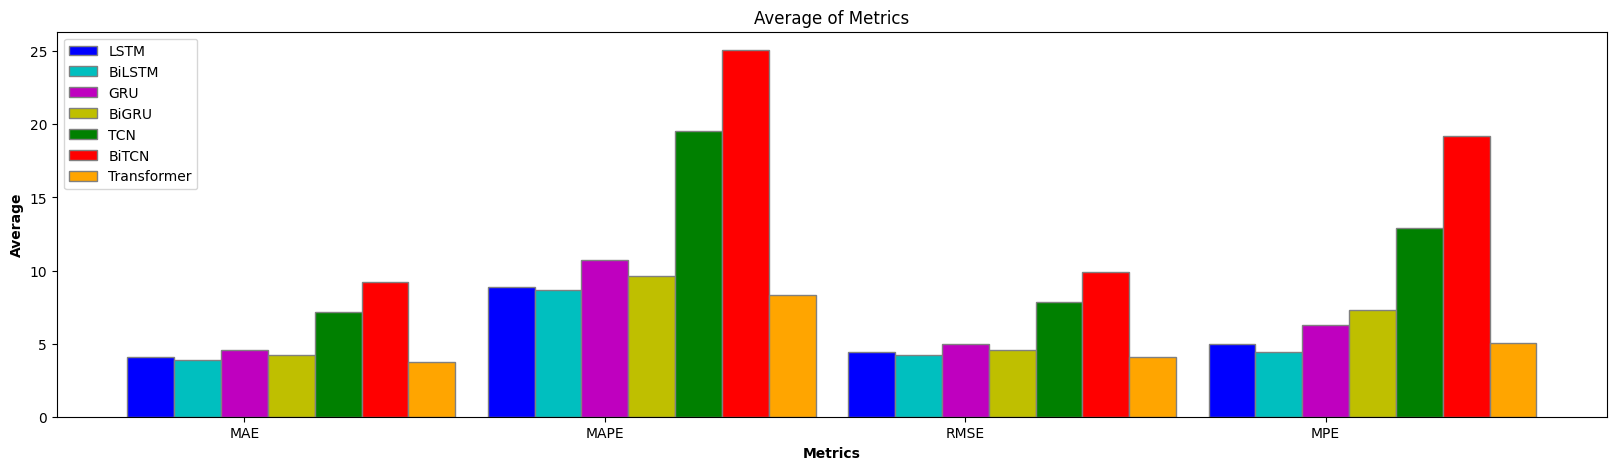

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_lstm, df_bilstm, df_gru, df_bigru, df_tcn, and df_bitcn are defined

test_metrics = ['MAE', 'MAPE', 'RMSE', 'MPE']

# Data for the stacked bar graph
#remove from values in Average(std) the portion fo the string that is in parenthesis and turn into float
lstm_data = [float(x.split(" ")[0]) for x in df_lstm_testing['Average(std)']]
bilstm_data = [float(x.split(" ")[0]) for x in df_bilstm_testing['Average(std)']]
gru_data = [float(x.split(" ")[0]) for x in df_gru_testing['Average(std)']]
bigru_data = [float(x.split(" ")[0]) for x in df_bigru_testing['Average(std)']]
tcn_data = [float(x.split(" ")[0]) for x in df_tcn_testing['Average(std)']]
bitcn_data = [float(x.split(" ")[0]) for x in df_bitcn_testing['Average(std)']]
trans_data=[float(x.split(" ")[0]) for x in df_trans_testing['Average(std)']]

barWidth = 0.13
r1 = np.arange(len(test_metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.figure(figsize=(20, 5))

plt.bar(r1, lstm_data[1:], color='b', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(r2, bilstm_data[1:], color='c', width=barWidth, edgecolor='grey', label='BiLSTM')
plt.bar(r3, gru_data[1:], color='m', width=barWidth, edgecolor='grey', label='GRU')
plt.bar(r4, bigru_data[1:], color='y', width=barWidth, edgecolor='grey', label='BiGRU')
plt.bar(r5, tcn_data[1:], color='g', width=barWidth, edgecolor='grey', label='TCN')
plt.bar(r6, bitcn_data[1:], color='r', width=barWidth, edgecolor='grey', label='BiTCN')
plt.bar(r7, trans_data[1:], color='orange', width=barWidth, edgecolor='grey', label='Transformer')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average', fontweight='bold')
plt.xticks([r + barWidth * 2 for r in range(len(test_metrics))], test_metrics)
plt.title('Average of Metrics')
plt.legend()
plt.show()


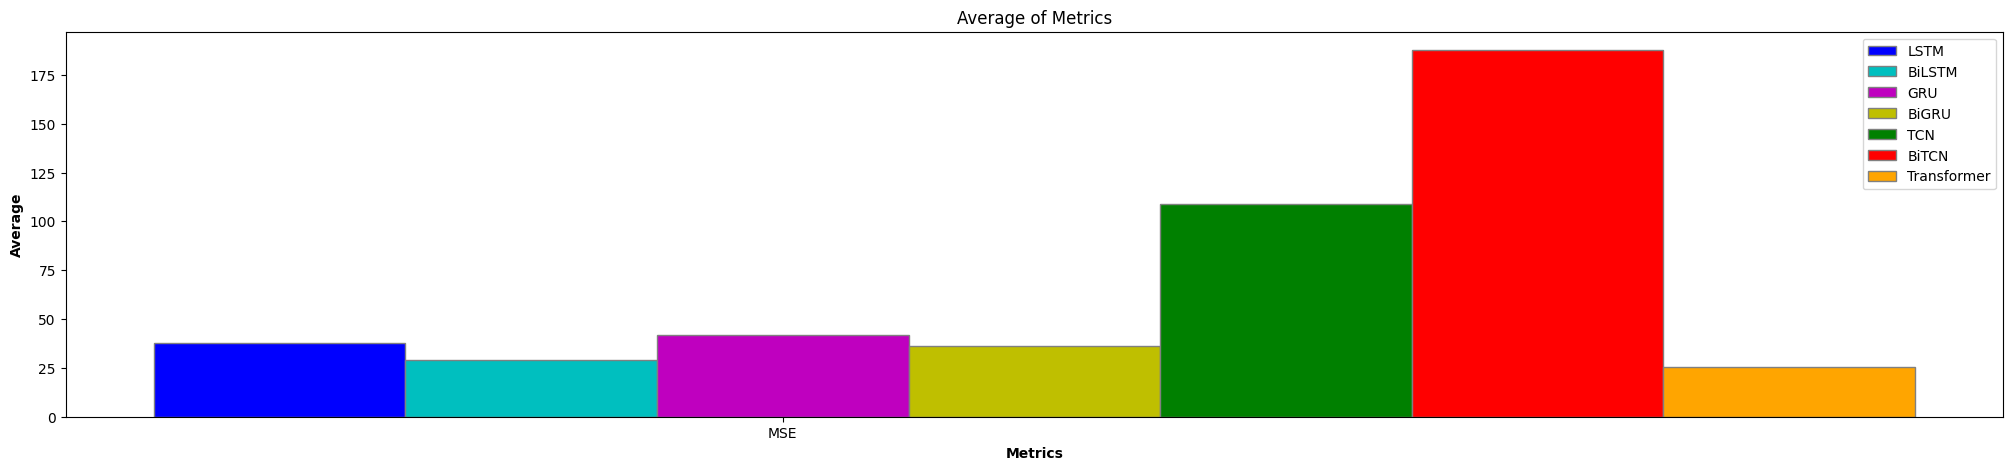

In [20]:
test_metrics = ['MSE']

# Data for the stacked bar graph
#remove from values in Average(std) the portion fo the string that is in parenthesis and turn into float
lstm_data = [float(x.split(" ")[0]) for x in df_lstm_testing['Average(std)']]
bilstm_data = [float(x.split(" ")[0]) for x in df_bilstm_testing['Average(std)']]
gru_data = [float(x.split(" ")[0]) for x in df_gru_testing['Average(std)']]
bigru_data = [float(x.split(" ")[0]) for x in df_bigru_testing['Average(std)']]
tcn_data = [float(x.split(" ")[0]) for x in df_tcn_testing['Average(std)']]
bitcn_data = [float(x.split(" ")[0]) for x in df_bitcn_testing['Average(std)']]
trans_data=[float(x.split(" ")[0]) for x in df_trans_testing['Average(std)']]

barWidth = 0.10
r1 = np.arange(len(test_metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.figure(figsize=(25, 5))

plt.bar(r1, lstm_data[0], color='b', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(r2, bilstm_data[0], color='c', width=barWidth, edgecolor='grey', label='BiLSTM')
plt.bar(r3, gru_data[0], color='m', width=barWidth, edgecolor='grey', label='GRU')
plt.bar(r4, bigru_data[0], color='y', width=barWidth, edgecolor='grey', label='BiGRU')
plt.bar(r5, tcn_data[0], color='g', width=barWidth, edgecolor='grey', label='TCN')
plt.bar(r6, bitcn_data[0], color='r', width=barWidth, edgecolor='grey', label='BiTCN')
plt.bar(r7, trans_data[0], color='orange', width=barWidth, edgecolor='grey', label='Transformer')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average', fontweight='bold')
plt.xticks([r + barWidth * 2 for r in range(len(test_metrics))], test_metrics)
plt.title('Average of Metrics')
plt.legend()
plt.show()


# Box Plot per metric and per company for all architectures


In [21]:
df_lstm_hyp = pd.read_csv('metrics/lstm_hypothesis.csv')
df_bilstm_hyp = pd.read_csv('metrics/bilstm_hypothesis.csv')
df_gru_hyp = pd.read_csv('metrics/gru_hypothesis.csv')
df_bigru_hyp = pd.read_csv('metrics/bigru_hypothesis.csv')
df_tcn_hyp = pd.read_csv('metrics/tcn_hypothesis.csv')
df_bitcn_hyp = pd.read_csv('metrics/bitcn_hypothesis.csv')
df_trans_hyp = pd.read_csv('metrics/transformer_hypothesis.csv')

classes=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

['MAE', 'MAPE', 'RMSE', 'MPE']

['MAE', 'MAPE', 'RMSE', 'MPE']

In [22]:
def get_company_split(df,metric):
    data=[[],[],[],[],[],[]]
    count=0
    for value in df[metric]:
        mod=count%6
        count+=1
        data[mod].append(value)
    return data

def box_gen(df):
    metrics=['MSE','MAE', 'MAPE', 'RMSE', 'MPE']
    plt.figure(figsize=(10, 20))
    for i in range(len(metrics)):
        data=get_company_split(df,metrics[i])
        plt.subplot(len(metrics),1,i+1)
        plt.boxplot(data, labels=classes,vert=False)
        plt.xlabel('Values')
        plt.ylabel(f'{metrics[i]} Values')
        plt.title('Companies')
    plt.subplots_adjust(hspace=1)  # Adjust spacing between subplots
    plt.show()
    


## LSTM

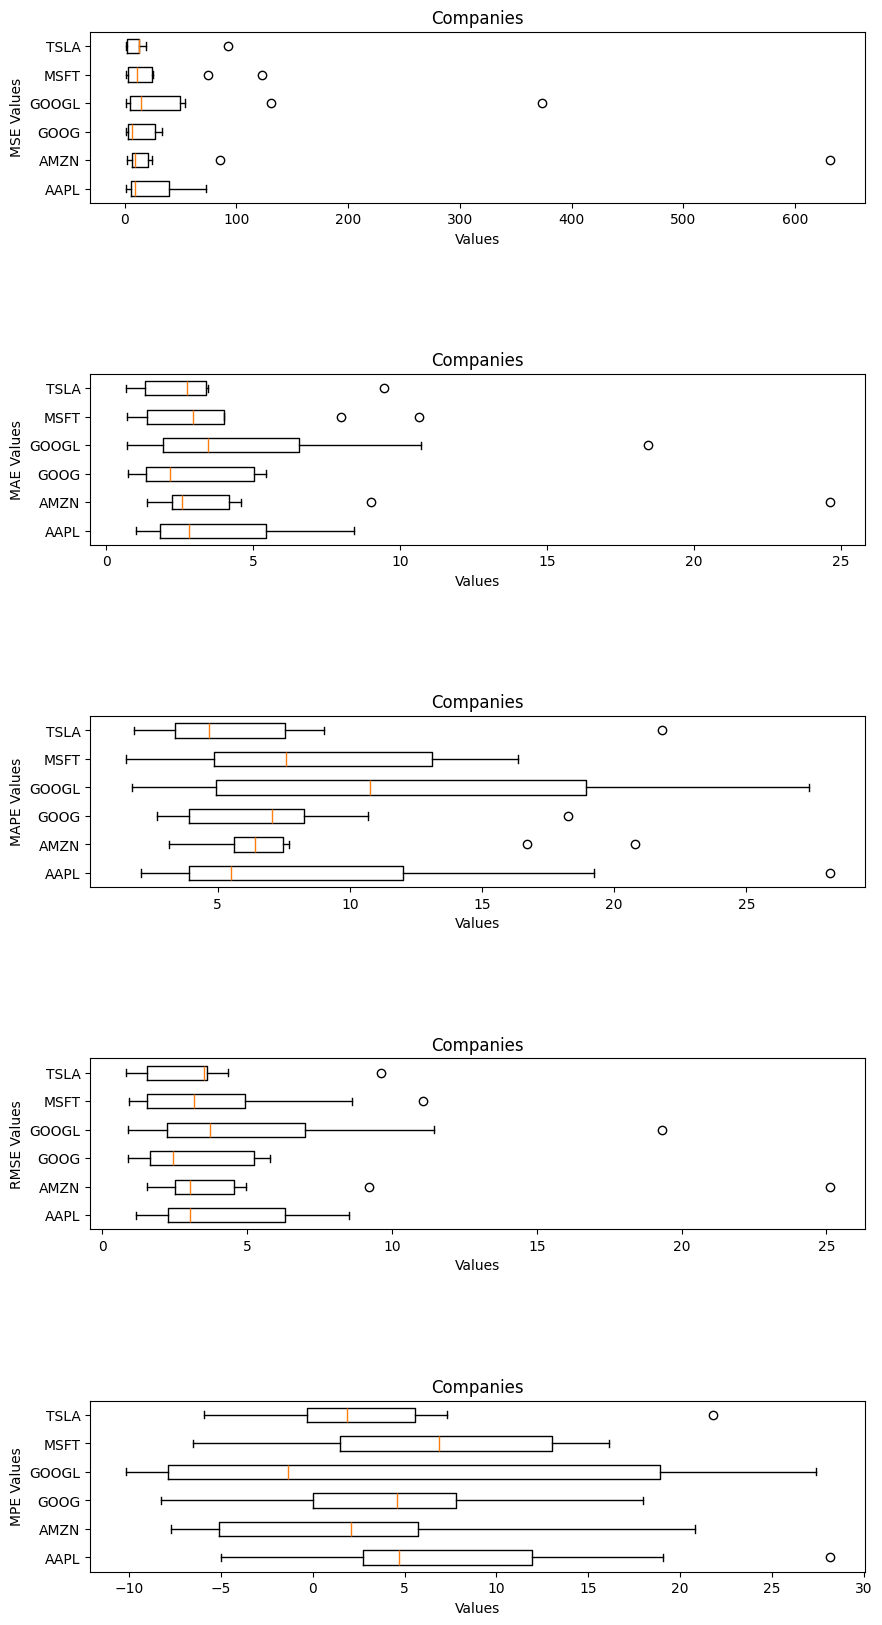

In [23]:

box_gen(df_lstm_hyp)



## Bidirectional LSTM

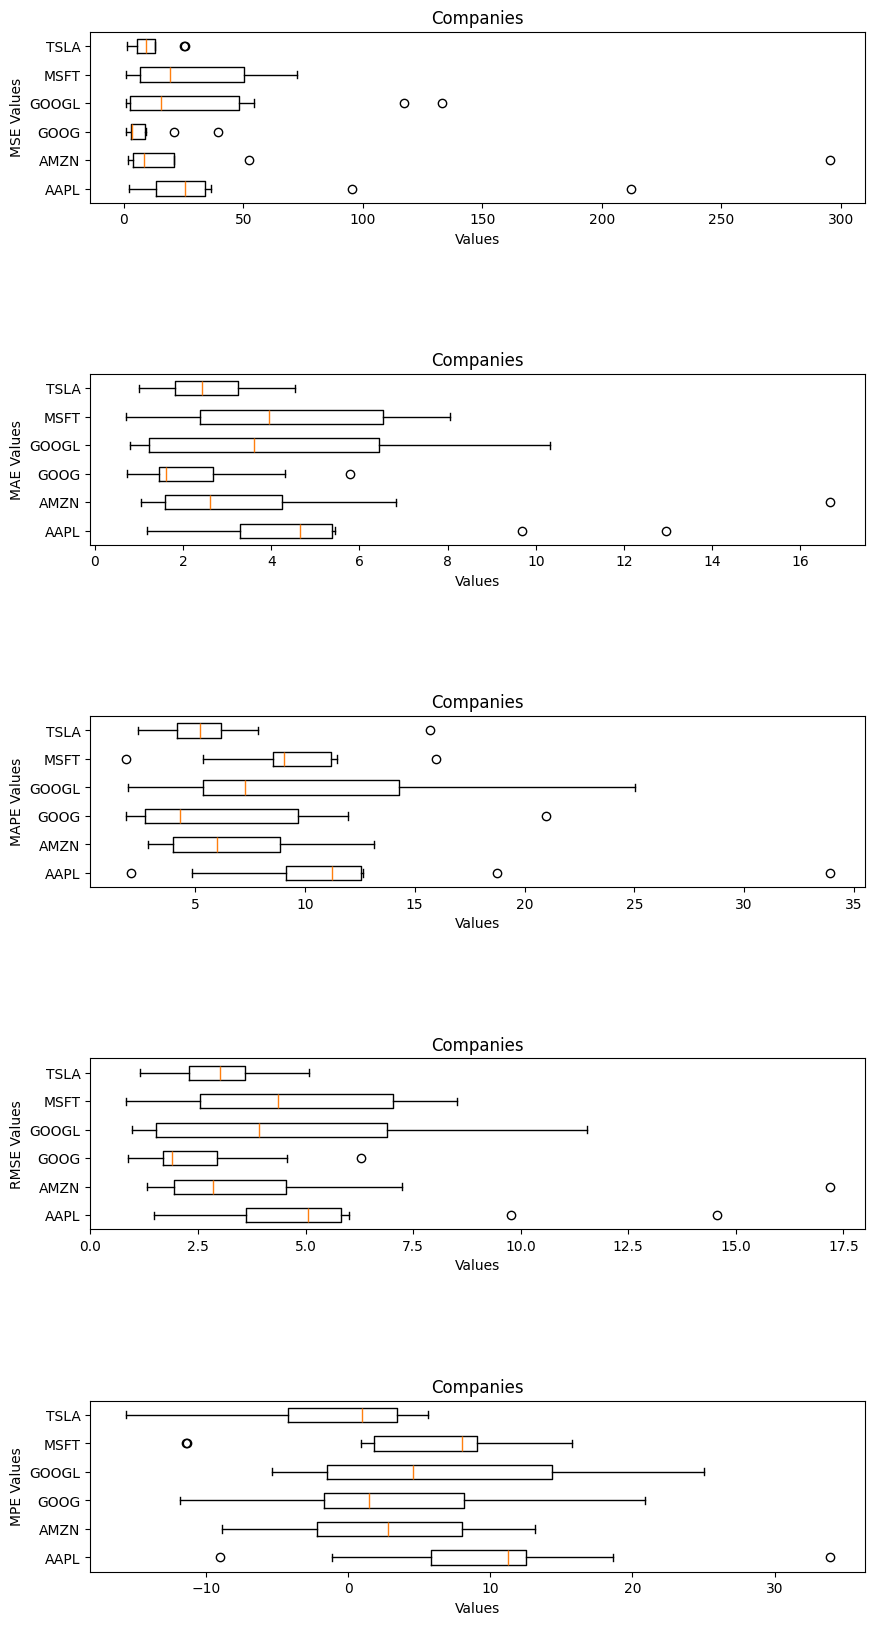

In [24]:
box_gen(df_bilstm_hyp)

## GRU

### MSE

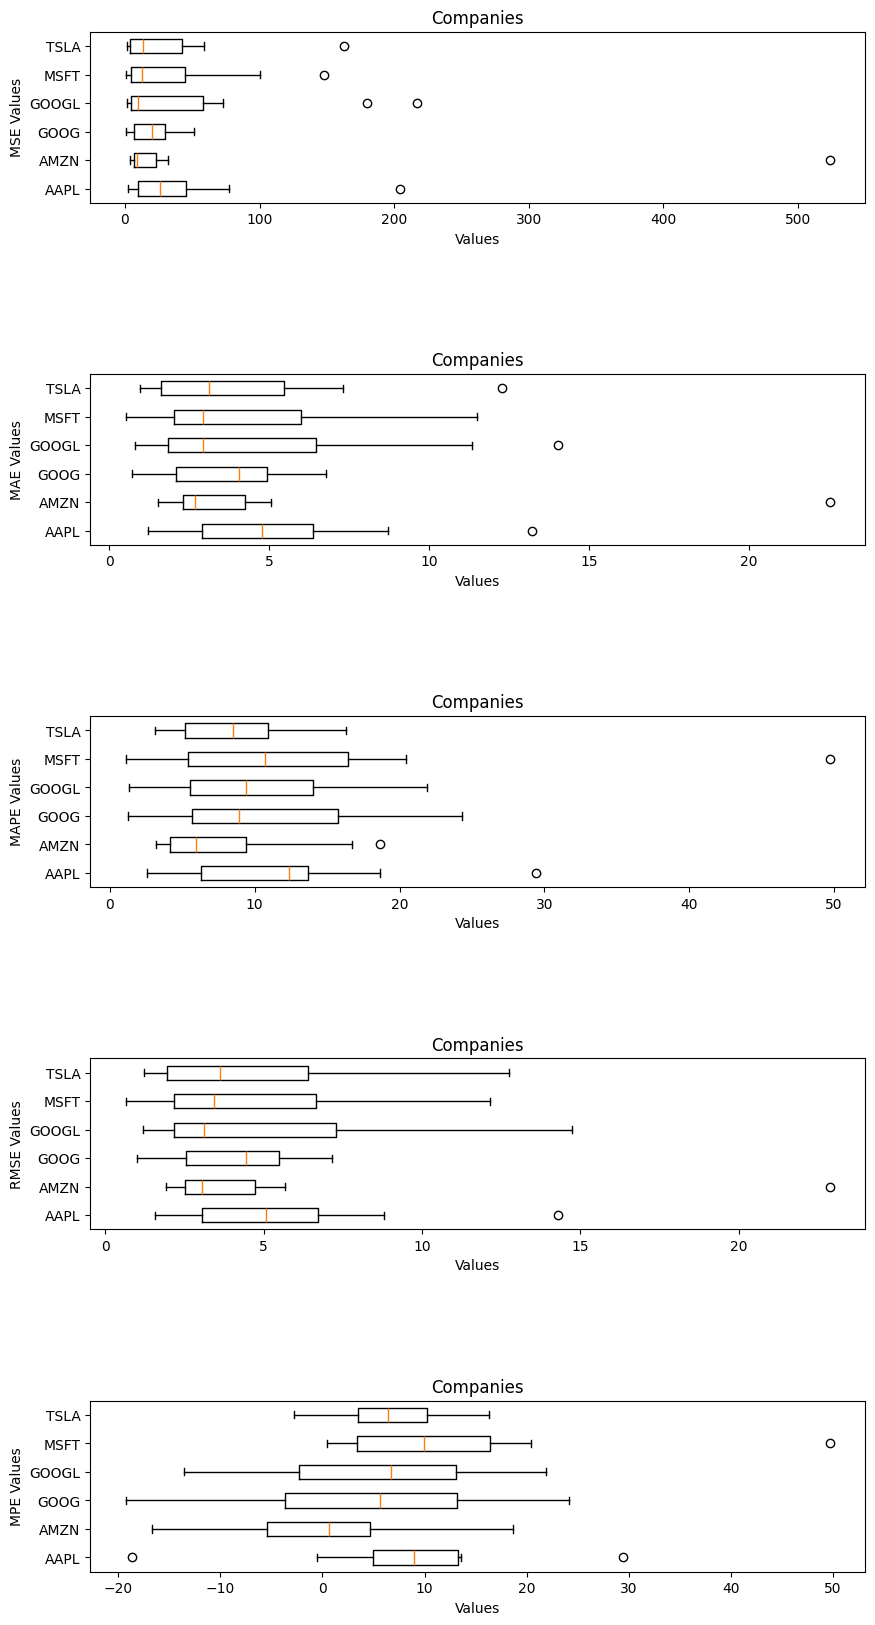

In [25]:
box_gen(df_gru_hyp)

## Bidirectional GRU

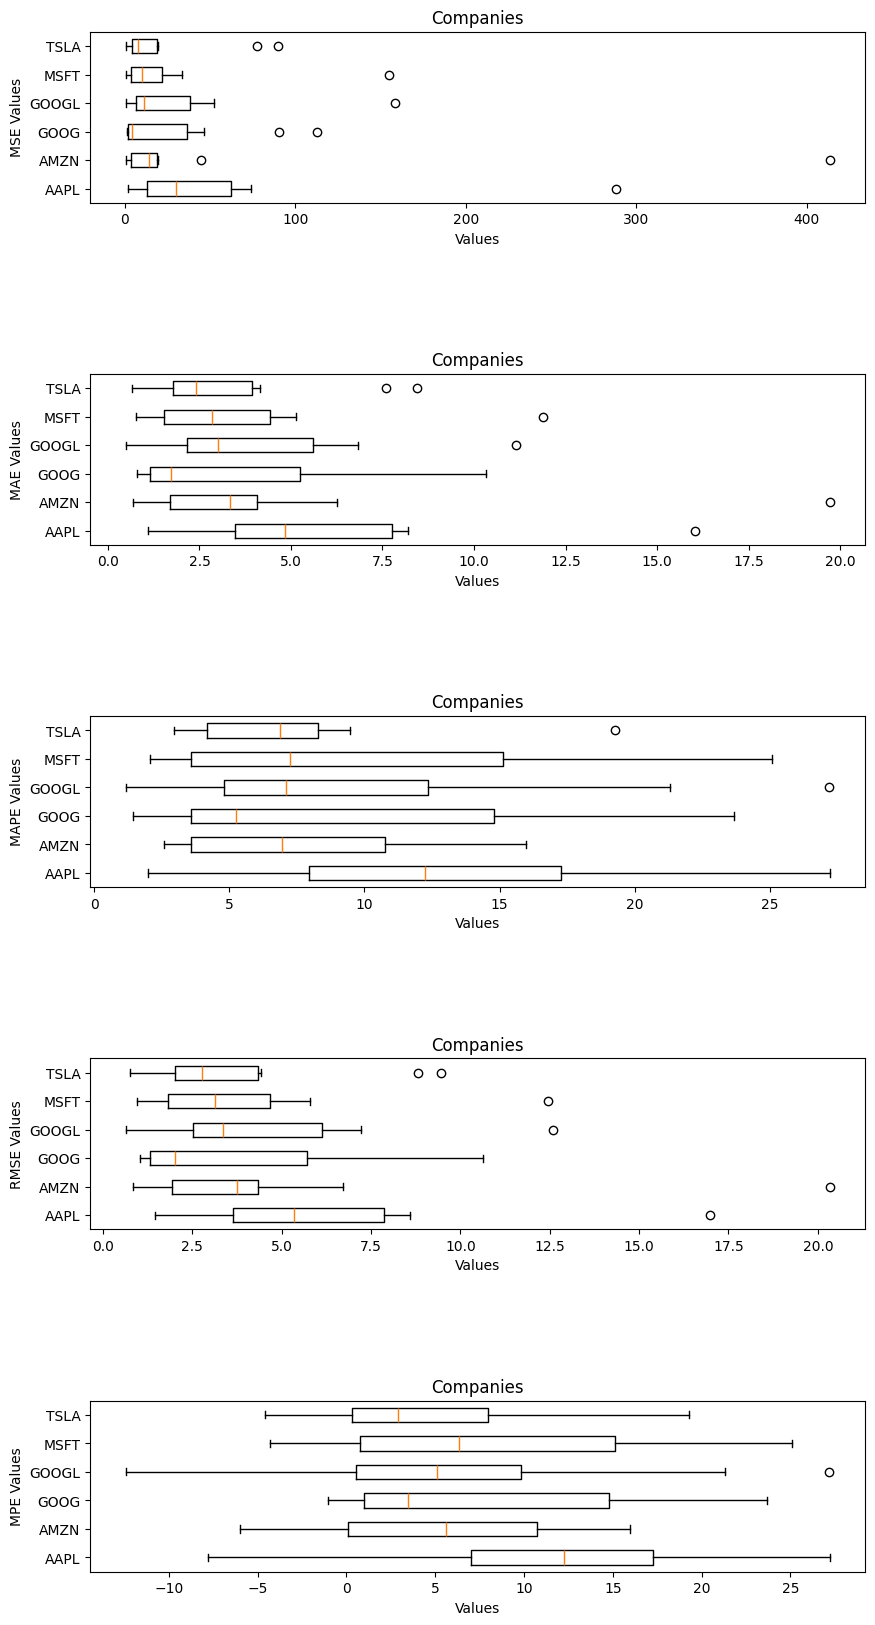

In [26]:
box_gen(df_bigru_hyp)

## TCN

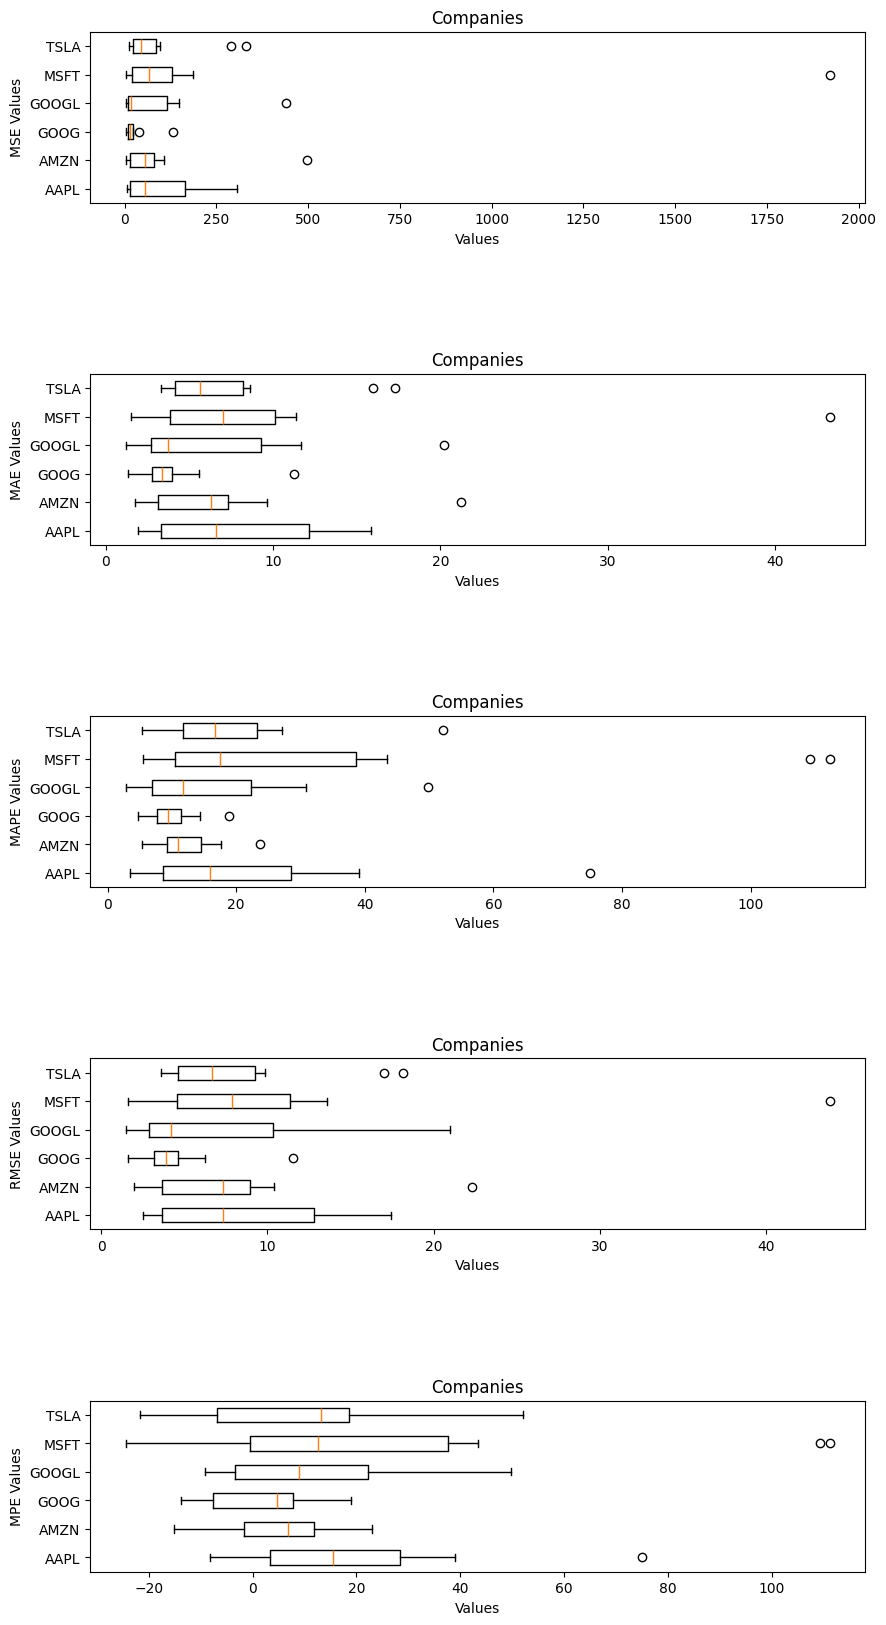

In [27]:
box_gen(df_tcn_hyp)

## Bidirectional TCN

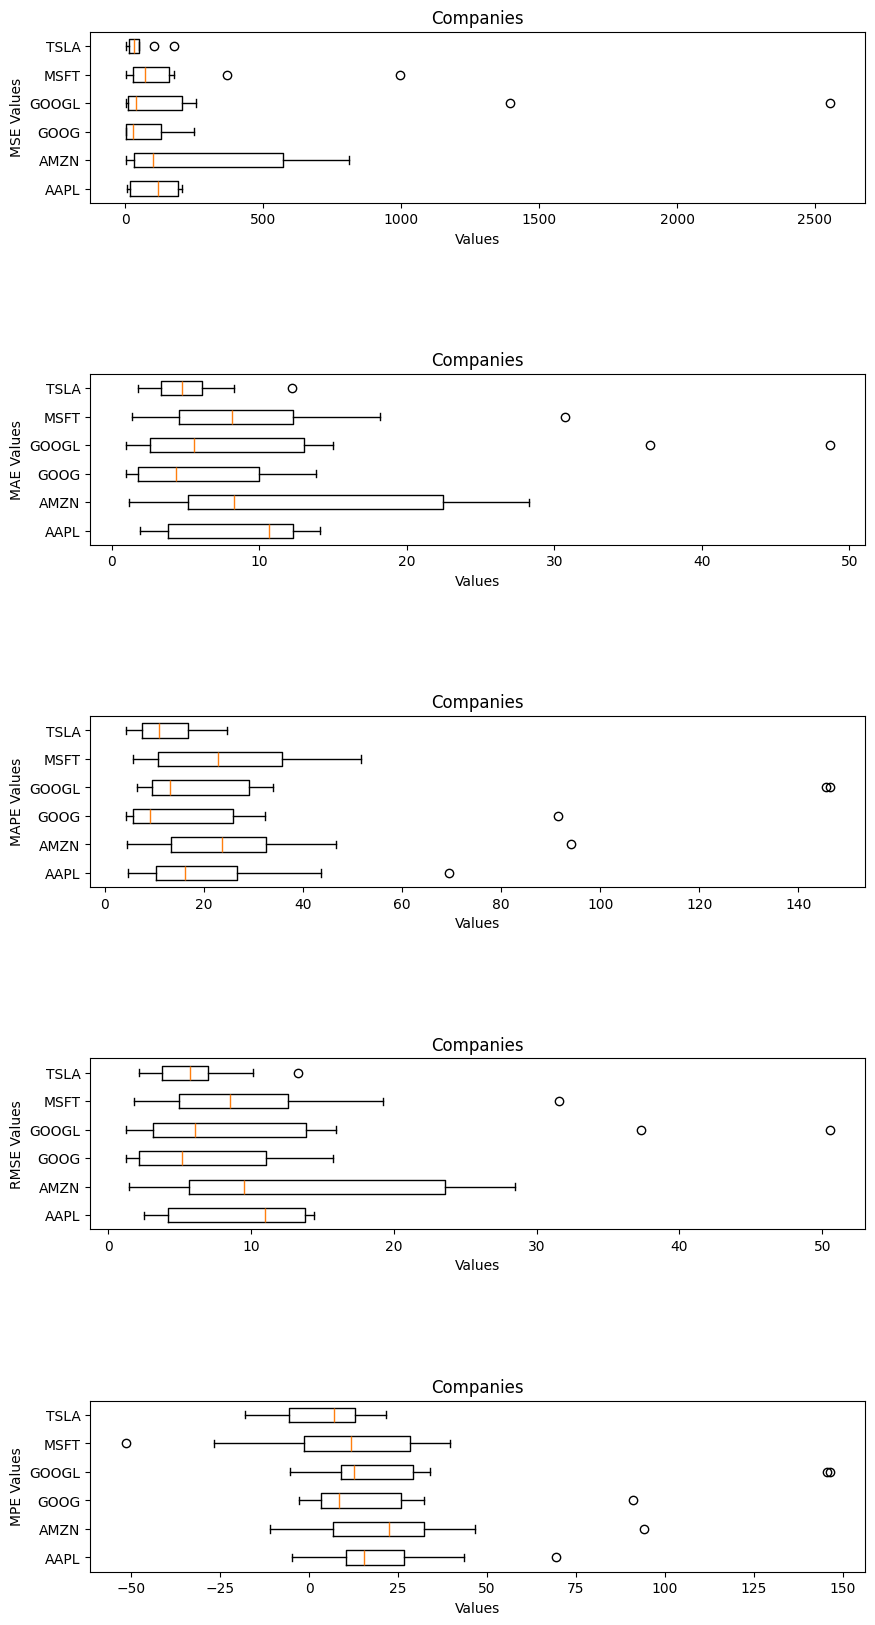

In [28]:
box_gen(df_bitcn_hyp)

# Transformer

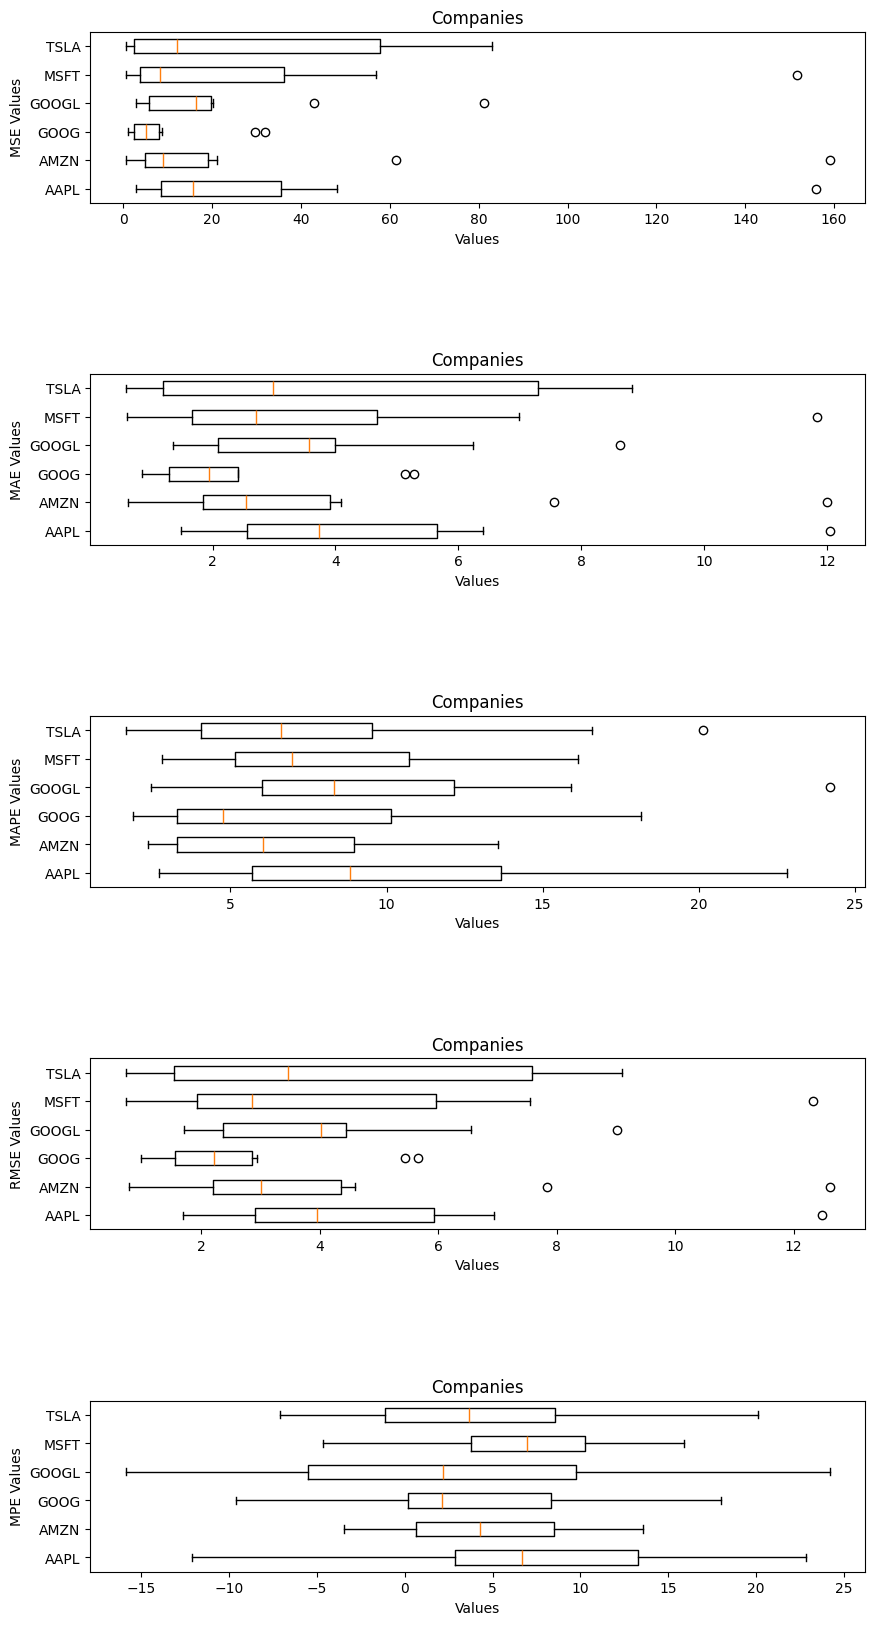

In [29]:
box_gen(df_trans_hyp)

# P Value per metric and per architecture

In [30]:
def p_per_metric(met):
    df_p_values=pd.DataFrame()
    df_p_values['Architectures']=['LSTM','BiLSTM','GRU','BiGRU','TCN','BiTCN','Transformer']
    metric=met
    ps=[]
    ps.append(wilcoxon(df_trans_hyp[metric],df_lstm_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_trans_hyp[metric],df_lstm_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_trans_hyp[metric],df_gru_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_trans_hyp[metric],df_bigru_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_trans_hyp[metric],df_tcn_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_trans_hyp[metric],df_bitcn_hyp[metric]).pvalue)
    ps.append('-')
    df_p_values['P Value']=ps
    df_p_values['Number of Parameters']=df_param['Average']

    return df_p_values

## MSE

In [31]:
p_per_metric('MSE')



,Architectures,P Value,Number of Parameters
0,LSTM,0.69,"79,116.00"
1,BiLSTM,0.69,"238,120.33"
2,GRU,0.02,"49,018.33"
3,BiGRU,0.20,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,-,"26,992.67"


## MAE

In [32]:
p_per_metric('MAE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.84,"79,116.00"
1,BiLSTM,0.84,"238,120.33"
2,GRU,0.02,"49,018.33"
3,BiGRU,0.23,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,-,"26,992.67"


## MAPE

In [33]:
p_per_metric('MAPE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.87,"79,116.00"
1,BiLSTM,0.87,"238,120.33"
2,GRU,0.02,"49,018.33"
3,BiGRU,0.19,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,-,"26,992.67"


## RMSE


In [34]:
p_per_metric('RMSE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.83,"79,116.00"
1,BiLSTM,0.83,"238,120.33"
2,GRU,0.01,"49,018.33"
3,BiGRU,0.21,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,-,"26,992.67"


## MPE

In [35]:
p_per_metric('MPE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.85,"79,116.00"
1,BiLSTM,0.85,"238,120.33"
2,GRU,0.35,"49,018.33"
3,BiGRU,0.02,"170,310.33"
4,TCN,0.04,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,-,"26,992.67"
